In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS
import re

In [59]:
# Load dataset
df = pd.read_excel('../data/output/labeled_n_aspect.xlsx', sheet_name='Sheet1')

# Rename kolom agar seragam
df.rename(columns={'Text Normalization': 'Tweet', 'Sentimen': 'Sentiment', 'Predicted_Aspect': 'Aspect'}, inplace=True)


1. SENTIMENT DISTRIBUTION

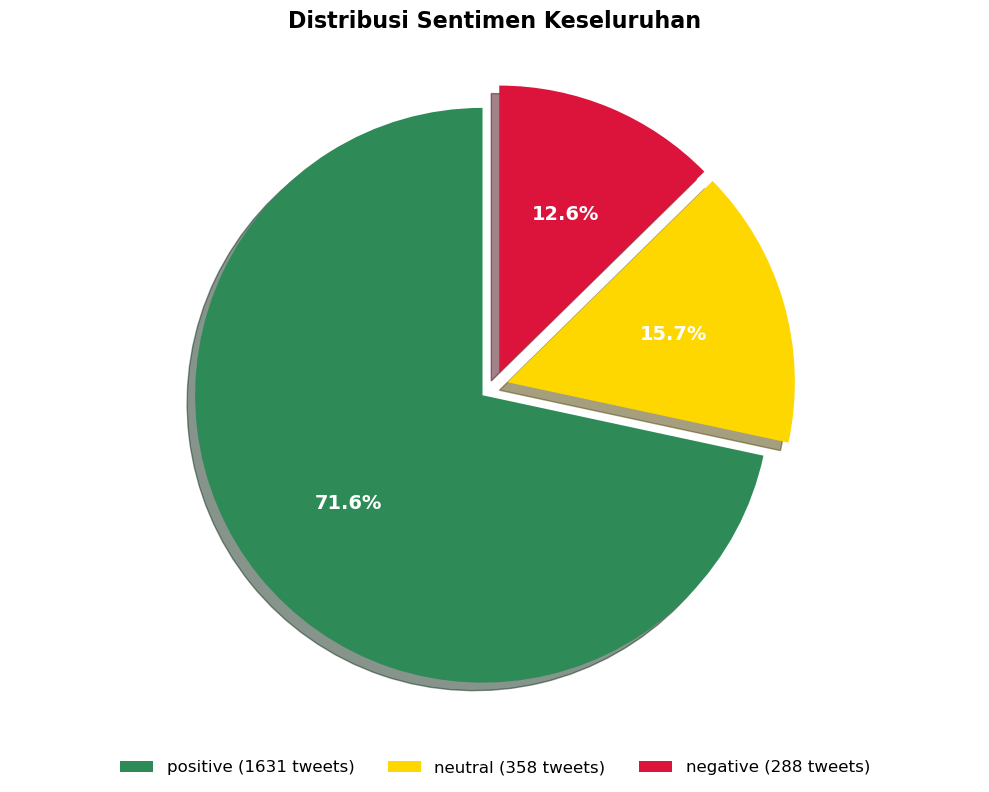

In [60]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
wedges, texts, autotexts = plt.pie(sentiment_counts, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=colors,
                                  explode=(0.05, 0.05, 0.05),
                                  shadow=True,
                                  textprops={'fontsize': 12, 'fontweight': 'bold'})

# Enhance the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')



plt.title('Distribusi Sentimen Keseluruhan', fontsize=16, fontweight='bold', pad=20)

# Create horizontal legend below the chart
legend_labels = [f'{label} ({count} tweets)' for label, count in zip(sentiment_counts.index, sentiment_counts.values)]
plt.legend(wedges, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, 
           fontsize=12, frameon=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

ASPECT VISUALIZATION

**PRODUK**

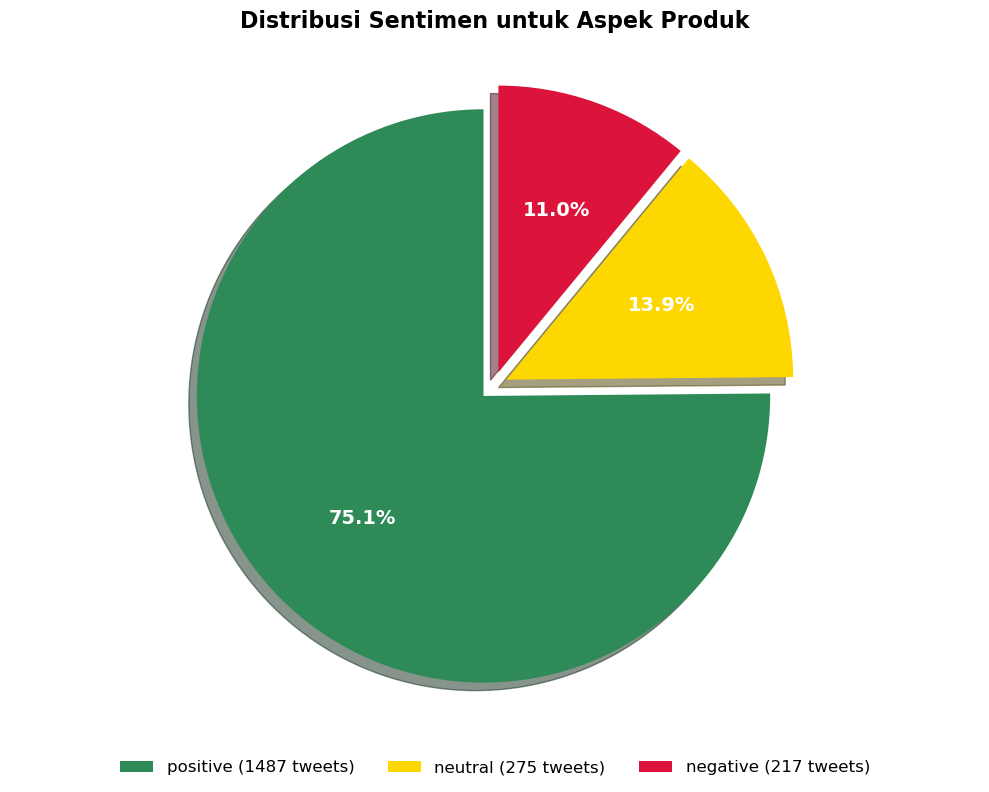

In [61]:
# Filter data for 'Produk' aspect
produk_data = df[df['Aspect'] == 'Produk']
produk_sentiment_counts = produk_data['Sentiment'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
wedges, texts, autotexts = plt.pie(produk_sentiment_counts, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=colors,
                                  explode=(0.05, 0.05, 0.05),
                                  shadow=True,
                                  textprops={'fontsize': 12, 'fontweight': 'bold'})

# Enhance the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Distribusi Sentimen untuk Aspek Produk', fontsize=16, fontweight='bold', pad=20)

# Create horizontal legend below the chart
legend_labels = [f'{label} ({count} tweets)' for label, count in zip(produk_sentiment_counts.index, produk_sentiment_counts.values)]
plt.legend(wedges, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, 
           fontsize=12, frameon=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

**PELAYANAN**

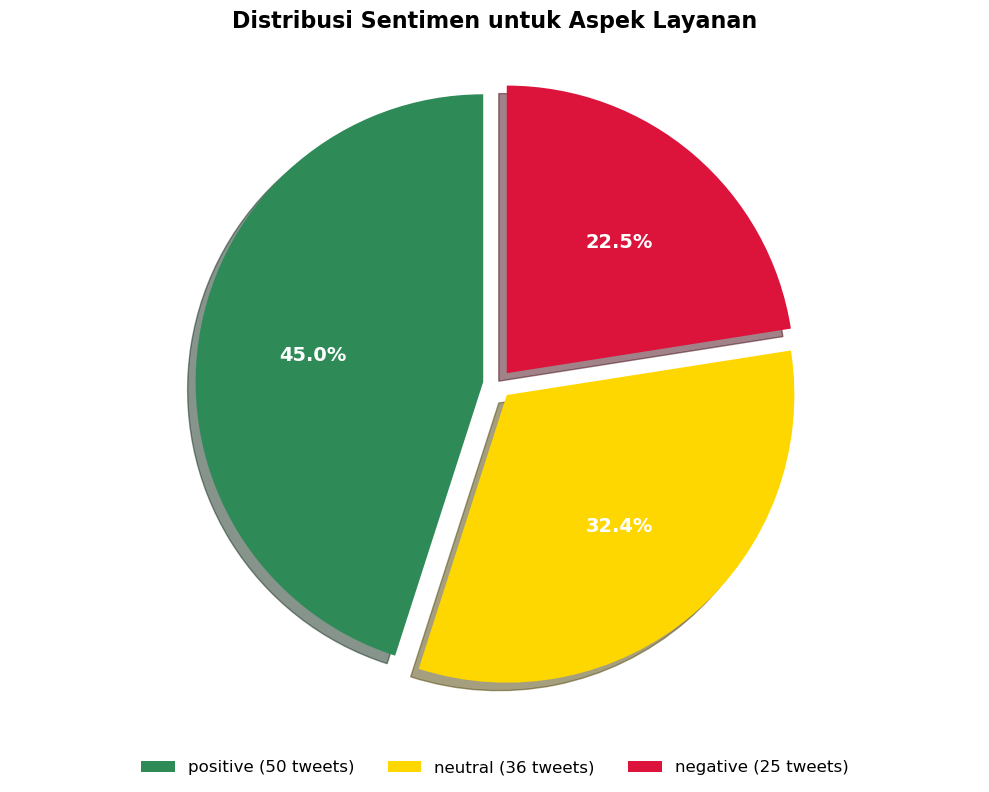

In [62]:
# Filter data untuk aspect 'Layanan'
layanan_data = df[df['Aspect'] == 'Layanan']
layanan_sentiment_counts = layanan_data['Sentiment'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
wedges, texts, autotexts = plt.pie(
    layanan_sentiment_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Percantik label persentase
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Judul
plt.title('Distribusi Sentimen untuk Aspek Layanan', 
          fontsize=16, fontweight='bold', pad=20)

# Legend di bawah chart
legend_labels = [
    f'{label} ({count} tweets)' 
    for label, count in zip(
        layanan_sentiment_counts.index, 
        layanan_sentiment_counts.values
    )
]
plt.legend(
    wedges, legend_labels, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.05), 
    ncol=3,
    fontsize=12, frameon=False
)

plt.axis('equal')
plt.tight_layout()
plt.show()


**UNIDENTIFIED**

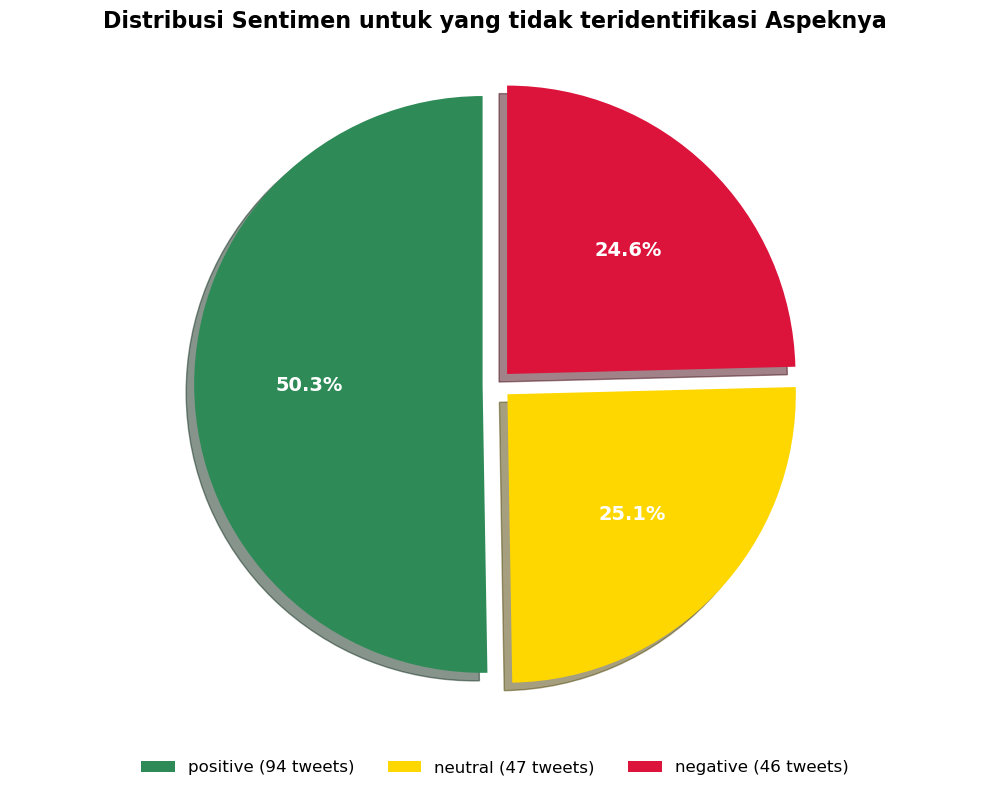

In [71]:
# Filter data untuk aspect 'None' (null values)
none_data = df[df['Aspect'].isna()]
none_sentiment_counts = none_data['Sentiment'].value_counts()

# Check if there's data to plot
if len(none_sentiment_counts) > 0:
    plt.figure(figsize=(10, 8))
    colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
    wedges, texts, autotexts = plt.pie(
        none_sentiment_counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(none_sentiment_counts)],
        explode=[0.05] * len(none_sentiment_counts),
        shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )

    # Percantik label persentase
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')

    # Judul
    plt.title('Distribusi Sentimen untuk yang tidak teridentifikasi Aspeknya', 
              fontsize=16, fontweight='bold', pad=20)

    # Legend di bawah chart
    legend_labels = [
        f'{label} ({count} tweets)' 
        for label, count in zip(
            none_sentiment_counts.index, 
            none_sentiment_counts.values
        )
    ]
    plt.legend(
        wedges, legend_labels, 
        loc='upper center', 
        bbox_to_anchor=(0.5, -0.05), 
        ncol=3,
        fontsize=12, frameon=False
    )

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("No data found for unidentified aspects (None values)")
    print(f"Total records with null aspects: {df['Aspect'].isna().sum()}")
    print(f"Unique aspect values: {df['Aspect'].value_counts(dropna=False)}")


2. TOP 10 WORDS

In [82]:
import re
import json
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# 0. Load slang dictionary
try:
    with open('../src/NLP_bahasa_resources/combined_slang_words.txt', 'r', encoding='utf-8') as f:
        slang_dict = json.load(f)
except FileNotFoundError:
    print("Error: Slang dictionary file not found. Please check the file path.")
    slang_dict = {}
except json.JSONDecodeError:
    print("Error: Failed to decode JSON from the slang dictionary file.")
    slang_dict = {}

# 1. Define stopwords (wordcloud + additional + brand)
brand_stopwords = {
    'fore', 'tomoro', 'kopi', 'kenangan', 'point', 'coffee',
    'kenangancoffee', 'kopikenangan', 'pointcoffee', 'tuku',
    'kopken', 'janjiw', 'famima', 'calf', 'janji jiwa'
}
additional_stopwords = {
    'iya','ya','tapi','yang','dan','di','ke','dari','untuk',
    'dengan','pada','ini','itu','atau','yg','aku','kalo','gak',
    'gini','aja','sih','si','kamu','kita','lu','lo','nya','sama',
    'bisa','ada','juga','buat','nggak','kayak','soal','tuh','pake',
    'ga','tp','mau','kak','nama','karina','kakak', 'deh'
}
indonesia_s = stopwords.words('indonesian')
stopwords = set(indonesia_s) | additional_stopwords | brand_stopwords
stopwords_list = list(stopwords)

# 2. Preprocessing functions
def normalize_text(text):
    if pd.isna(text):
        return ""
    t = text.lower()
    t = re.sub(r'@\w+', '', t)
    t = re.sub(r'http\S+|www\.\S+', '', t)
    t = re.sub(r'[^a-z0-9\s]', '', t)
    return t.strip()

def normalize_slang(text):
    return ' '.join(slang_dict.get(w, w) for w in text.split())

# 3. Load data & apply preprocessing
df = pd.read_excel('../data/output/labeled_n_aspect.xlsx', sheet_name='Sheet1')
df['Tweet'] = (
    df['Text'].astype(str)
       .apply(normalize_text)
       .apply(normalize_slang)
)
df.rename(columns={'Sentimen':'Sentiment','Predicted_Aspect':'Aspect'}, inplace=True)



**TOP 10 PRODUK**

In [83]:
# Filter untuk Aspek Layanan
produk_data = df[df['Aspect'] == 'Produk']
sentiment_map = {
    'positive': 'Positif',
    'neutral':  'Netral',
    'negative': 'Negatif'
}
# Hitung top-10 kata per sentiment
produk_sentiment_words = {}
for sentiment in produk_data['Sentiment'].unique():
    texts = produk_data.loc[produk_data['Sentiment']==sentiment, 'Tweet']
    vect = CountVectorizer(stop_words=stopwords_list)
    X = vect.fit_transform(texts)
    freqs = X.sum(axis=0).A1
    items = vect.get_feature_names_out()
    word_freq = list(zip(items, freqs))
    top10 = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]
    df_top10 = pd.DataFrame(top10, columns=['Word','Frequency'])
    df_top10['Rank'] = range(1, len(df_top10)+1)
    produk_sentiment_words[sentiment] = df_top10

# Pertama, pastikan urutan rank 1–10 sama untuk semua
ranks = range(1, 11)

# Ambil tiap df, index-kan berdasarkan Rank
tables = {}
for s_raw, df_top in produk_sentiment_words.items():
    # set index ke Rank dan buat kolom “Word (Frequency)”
    col = df_top.set_index('Rank').apply(lambda row: f"{row.Word} ({row.Frequency})", axis=1)
    # jika kurang dari 10, isi sisa dengan string kosong
    col = col.reindex(ranks, fill_value='')
    tables[sentiment_map[s_raw]] = col

# Susun DataFrame gabungan
combined = pd.DataFrame(tables, index=ranks)
combined.index.name = 'Rank'
# ------------------------------------------------

# 3) Tampilkan
print("Top 10 Words for Each Sentiment in Produk Aspect:")
print(combined.to_markdown())


Top 10 Words for Each Sentiment in Produk Aspect:
|   Rank | Netral           | Positif            | Negatif     |
|-------:|:-----------------|:-------------------|:------------|
|      1 | beli (42)        | enak (453)         | minum (30)  |
|      2 | junior (16)      | latte (229)        | banget (20) |
|      3 | janji (12)       | banget (217)       | beli (20)   |
|      4 | nder (12)        | matcha (212)       | mahal (14)  |
|      5 | jiwa (11)        | suka (181)         | coba (13)   |
|      6 | matcha (10)      | gula (134)         | nyoba (11)  |
|      7 | pakai (10)       | butterscotch (126) | enak (10)   |
|      8 | butterscotch (9) | coba (100)         | habis (10)  |
|      9 | coba (9)         | beli (97)          | nder (9)    |
|     10 | enakan (9)       | sea (92)           | pengen (9)  |


c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'janji', 'jiwa', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'janji', 'jiwa', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'janji', 'jiwa', 'kali', 'kurangnya', 'mata', 'olah', 'sekuran

**TOP 10 LAYANAN**

In [78]:
# Filter untuk Aspek Layanan
layanan_data = df[df['Aspect'] == 'Layanan']
sentiment_map = {
    'positive': 'Positif',
    'neutral':  'Netral',
    'negative': 'Negatif'
}
# Hitung top-10 kata per sentiment
layanan_sentiment_words = {}
for sentiment in layanan_data['Sentiment'].unique():
    texts = layanan_data.loc[layanan_data['Sentiment']==sentiment, 'Tweet']
    vect = CountVectorizer(stop_words=stopwords_list)
    X = vect.fit_transform(texts)
    freqs = X.sum(axis=0).A1
    items = vect.get_feature_names_out()
    word_freq = list(zip(items, freqs))
    top10 = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]
    df_top10 = pd.DataFrame(top10, columns=['Word','Frequency'])
    df_top10['Rank'] = range(1, len(df_top10)+1)
    layanan_sentiment_words[sentiment] = df_top10

# Pertama, pastikan urutan rank 1–10 sama untuk semua
ranks = range(1, 11)

# Ambil tiap df, index-kan berdasarkan Rank
tables = {}
for s_raw, df_top in layanan_sentiment_words.items():
    # set index ke Rank dan buat kolom “Word (Frequency)”
    col = df_top.set_index('Rank').apply(lambda row: f"{row.Word} ({row.Frequency})", axis=1)
    # jika kurang dari 10, isi sisa dengan string kosong
    col = col.reindex(ranks, fill_value='')
    tables[sentiment_map[s_raw]] = col

# Susun DataFrame gabungan
combined = pd.DataFrame(tables, index=ranks)
combined.index.name = 'Rank'
# ------------------------------------------------

# 3) Tampilkan
print("Top 10 Words for Each Sentiment in Layanan Aspect:")
print(combined.to_markdown())


Top 10 Words for Each Sentiment in Layanan Aspect:
|   Rank | Netral        | Positif     | Negatif      |
|-------:|:--------------|:------------|:-------------|
|      1 | pakai (10)    | banget (10) | pas (4)      |
|      2 | app (5)       | diskon (7)  | jungkook (3) |
|      3 | beli (4)      | enak (6)    | pakai (3)    |
|      4 | buka (4)      | pas (6)     | app (2)      |
|      5 | 50 (3)        | 50 (4)      | banget (2)   |
|      6 | bayar (3)     | ngopi (4)   | coba (2)     |
|      7 | isi (3)       | pakai (4)   | deket (2)    |
|      8 | min (3)       | beli (3)    | ice (2)      |
|      9 | pas (3)       | kotaku (3)  | mas2nya (2)  |
|     10 | transaksi (3) | nder (3)    | org (2)      |


c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_word

**TOP 10 UNIDENTIFIED**

In [84]:
# Filter data untuk aspect 'None' (null values)
none_data = df[df['Aspect'].isna()]
none_sentiment_counts = none_data['Sentiment'].value_counts()

sentiment_map = {
    'positive': 'Positif',
    'neutral':  'Netral',
    'negative': 'Negatif'
}
# Hitung top-10 kata per sentiment
none_sentiment_words = {}
for sentiment in none_data['Sentiment'].unique():
    texts = none_data.loc[none_data['Sentiment']==sentiment, 'Tweet']
    vect = CountVectorizer(stop_words=stopwords_list)
    X = vect.fit_transform(texts)
    freqs = X.sum(axis=0).A1
    items = vect.get_feature_names_out()
    word_freq = list(zip(items, freqs))
    top10 = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]
    df_top10 = pd.DataFrame(top10, columns=['Word','Frequency'])
    df_top10['Rank'] = range(1, len(df_top10)+1)
    none_sentiment_words[sentiment] = df_top10

# Pertama, pastikan urutan rank 1–10 sama untuk semua
ranks = range(1, 11)

# Ambil tiap df, index-kan berdasarkan Rank
tables = {}
for s_raw, df_top in none_sentiment_words.items():
    # set index ke Rank dan buat kolom “Word (Frequency)”
    col = df_top.set_index('Rank').apply(lambda row: f"{row.Word} ({row.Frequency})", axis=1)
    # jika kurang dari 10, isi sisa dengan string kosong
    col = col.reindex(ranks, fill_value='')
    tables[sentiment_map[s_raw]] = col

# Susun DataFrame gabungan
combined = pd.DataFrame(tables, index=ranks)
combined.index.name = 'Rank'
# ------------------------------------------------

# 3) Tampilkan
print("Top 10 Words for Each Sentiment in Unidentified Aspect:")
print(combined.to_markdown())


Top 10 Words for Each Sentiment in Unidentified Aspect:
|   Rank | Positif      | Netral       | Negatif     |
|-------:|:-------------|:-------------|:------------|
|      1 | suka (5)     | no (4)       | alias (2)   |
|      2 | kafe (4)     | kureng (2)   | arah (2)    |
|      3 | tim (4)      | nder (2)     | he (2)      |
|      4 | banget (3)   | surabaya (2) | janji (2)   |
|      5 | foretuku (3) | teman (2)    | jiwa (2)    |
|      6 | hati (3)     | uang (2)     | males (2)   |
|      7 | kangen (3)   | wkwk (2)     | sihh (2)    |
|      8 | nder (3)     | 35 (1)       | yaa (2)     |
|      9 | cinta (2)    | 3point (1)   | aaahhhh (1) |
|     10 | cuman (2)    | ane (1)      | akuu (1)    |


c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'janji', 'jiwa', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'janji', 'jiwa', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'janji', 'jiwa', 'kali', 'kurangnya', 'mata', 'olah', 'sekuran